* V : Value

* T : Type

* L : Length

* I : Image

* C : Child

In [1]:
import re

import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

from CustomConfig import CustomConfig

In [2]:
class PrintElement:
      
      def __init__(self) -> None:
          self.cfg = CustomConfig(
                delimiter_end = '=' * 40,
                delimiter_end_element = "\t",
                set_element = 'vtl',
                max_num_print = 5
          )
      
      def _v(self, var, name):
            print(f'{name} : {var}')

      def _t(self, var, name):
            print(f'type : {type(var)}')

      def _l(self, var, name):
            if isinstance(var, (torch.Tensor, np.ndarray, pd.DataFrame)):
                  length = var.shape
            else:
                  try:
                     length = len(var)
                  except:
                     length = "Not Iterable"

            print(f"length : {length}")

      def _i(self, var, name):
            plt.imshow(var, cmap='gray')
            plt.title("{}".format(name))
            plt.axis('off')
            plt.show()

      def _c(self, iterator, name):
            set_element = self.cfg.set_element
            end_element = self.cfg.delimiter_end_element
            max_num_print = self.cfg.max_num_print
            #### CFG
            funcs = self.call_func(set_element)
            
            for idx, element in enumerate(iterator):
                  if idx >= max_num_print:
                        print(f"\nToo Many Items........\nMax_num_print : {max_num_print}")
                        break

                  name_child = f"{name}[{str(idx)}]"

                  print(end_element)
                  for func in funcs:
                        print(end_element, end="")
                        func(element, name_child)


In [3]:

class CustomPrint(PrintElement):    
      WORDS_REGISTERED = 'vtlic'
      
      @staticmethod
      def about():
            list_allowed = [i for i in CustomPrint.WORDS_REGISTERED] 
            print(f"characters allowed in this class : {list_allowed}")
            return  list_allowed
            
      def __init__(self, basic_set : str='vtl'):
            super().__init__()
            self.cfg = CustomConfig(
                  delimiter_end = '=' * 40,
                  delimiter_end_element = "\t",
                  set_element = 'vtl',
                  max_num_print = 5
            )
            #### Changable CFG
            self._regexr = re.compile(f"[^{CustomPrint.WORDS_REGISTERED}]")
            
            self._funcs = self.call_func(basic_set)
            
      def __call__(self, var, name : str='value'):
            end = self.cfg.delimiter_end
            #### CFG
            for func in self._funcs:
                  func(var, name)

            print(end)
            
      def __getattr__(self, attr):
            funcs = self.call_func(attr)

            end = self.cfg.delimiter_end
            #### CFG
            def Func(var, name='value'):
                  for func in funcs:
                        func(var, name)
                  
                  print(end)
            
            return Func
      
      def inspect(self, set : str):
            
            error_sentence = \
                  """There are some characters not allowed in this class. 
                  Check 'CustomPrint.about()'."""
            assert not (self._regexr.search(set)), error_sentence
            # assert True, error_sentence
      
      def call_func(self, attr:str):
             self.inspect(attr)
             return [getattr(self, f"_{func_name}") for func_name in attr]
            

In [4]:
p = CustomPrint()
pc = CustomPrint('vtlc')
pi = CustomPrint('itl')

In [5]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt


# def p(var, name='val', end="=" * 40):
#   funcs = [V, T, L]

#   for func in funcs:
#     print(func(var, name))

#   print(end)

# def pc(var, name='val', end="=" * 40, end_element="\t"):
#   p(var, name, end="")

#   chd = C(var, name)
#   print(f"\n{end_element}".join(chd))

#   print(end)

# def pi(var, name='img', end="=" * 40):
#   funcs = [I, T, L]

#   for func in funcs:
#     print(func(var, name))

#   print(end)
# #################################################
# def V(var, name):
#   return f'{name} : {var}'

# def T(var, name):
#   return f'type : {type(var)}'

# def L(var, name):
#   if isinstance(var, torch.Tensor):
#     length = var.shape

#   elif isinstance(var, np.ndarray):
#     length = var.shape

#   elif isinstance(var, list):
#     length = len(var)

#   else:
#     length = "1"

#   return f"length : {length}"

# def I(var, name):
#   plt.imshow(var, cmap='gray')
#   plt.title("{}".format(name))
#   plt.axis('off')
#   plt.show()
#   return ""

# def C(iterator, name, funcs=[V, T, L]):
#   res = []

#   for idx, element in enumerate(iterator):
#     res.append("")
#     name_child = f"{name}[{str(idx)}]"

#     for func in funcs:
#       res.append(func(element, name_child))
#   return res

In [6]:
img = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]
          ])

value : tensor([1, 2, 3, 4])
type : <class 'torch.Tensor'>
length : torch.Size([4])
value : [0 1 2 3 4 5 6]
type : <class 'numpy.ndarray'>
length : (7,)
value : [1, 2, 3, 4]
type : <class 'list'>
length : 4
value : 1
type : <class 'int'>
length : Not Iterable
value : tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
type : <class 'torch.Tensor'>
length : torch.Size([100])
	
	value[0] : 0
	type : <class 'torch.Tensor'>
	length : torch.Size([])
	
	value[1] : 1
	type : <class 'torch.Tensor'>
	length : torch.Size([])
	
	value[2] : 2
	type : <class 'torch.Tensor'>
	length : torch.Size([])
	
	value[3

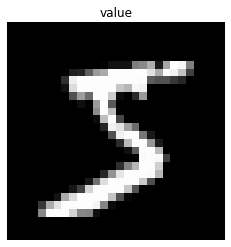

type : <class 'numpy.ndarray'>
length : (28, 28)
value : 123
value : 123
type : <class 'int'>
value : 123
type : <class 'int'>
length : Not Iterable


In [7]:
p(torch.tensor([1,2,3,4]))
p(np.arange(7))
p([1,2,3,4])
p(1)
pc(torch.arange(100))
pi(img)

p.v(123)
p.vt(123)
p.vtl(123)

In [8]:
p.cfg

This is consisted of :
	delimiter_end = /========================================/
	delimiter_end_element = /	/
	set_element = /vtl/
	max_num_print = /5/